In [1]:
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0)

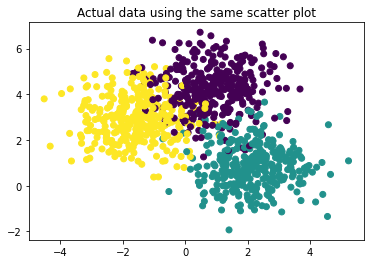

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.title('Actual data using the same scatter plot')
plt.show()

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_sKM = []
kAlg = KMeans(n_clusters=2, random_state=0)
y_pre = kAlg.fit_predict(X)
silh_scoreKM = silhouette_score(X,y_pre)
silhouette_sKM.append(silh_scoreKM)
print(silh_scoreKM)

0.4686945393573536


In [4]:
from sklearn.mixture import GaussianMixture
silhouette_scoreGM = []
gaussianMixture = GaussianMixture(n_components=2, random_state=0)
y_preGM = gaussianMixture.fit_predict(X)
silh_scoreGM = silhouette_score(X,y_preGM)
silhouette_scoreGM.append(silh_scoreGM)
print(silh_scoreGM)

0.47081317767024955


In [5]:
def plotTrainingHistory(history,i):
    axis[i].plot([3,5,8],history['knn'])
    axis[i].plot([3,5,8],history['gm'])
    axis[i].set_title('silhouette_score')
    axis[i].set_xlabel('clusters')
    axis[i].set_ylabel('silhouette_score')
    axis[i].legend(['knn', 'gm'], loc='best')

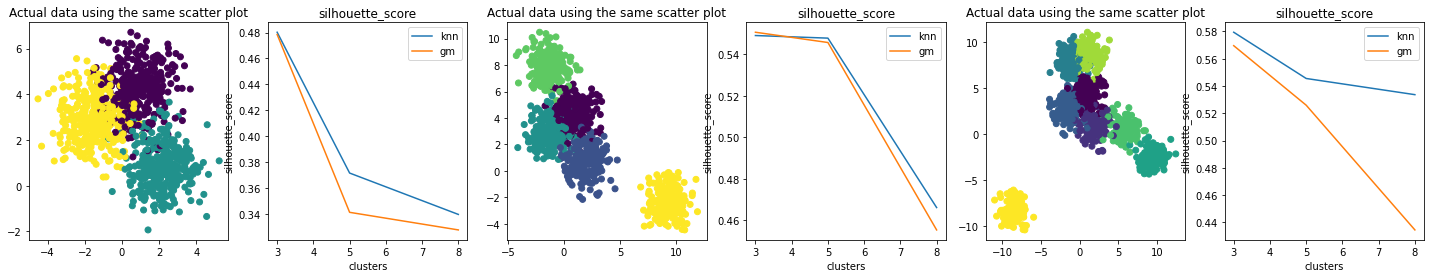

In [6]:
realCluster = [3,5,8]
fig, axis = plt.subplots(1, 6, figsize=(25,4))
count = 0
for i in realCluster:
    X,y = make_blobs(n_samples=1000,centers=i,n_features=2,random_state=0)
    axis[count].scatter(X[:, 0], X[:, 1], marker="o", c=y)
    axis[count].set_title('Actual data using the same scatter plot')
    count+=1
    history = {'knn':[],'gm':[]}
    for j in realCluster:
        kmeans = KMeans(n_clusters=j, random_state=0)
        y_pre = kmeans.fit_predict(X)
        knn_s_score = silhouette_score(X,y_pre)
        silhouette_sKM.append(knn_s_score)
        history['knn'].append(knn_s_score)
        gm = GaussianMixture(n_components=j, random_state=0)
        y_pre = gm.fit_predict(X)
        gm_s_score = silhouette_score(X,y_pre)
        silhouette_scoreGM.append(gm_s_score)
        history['gm'].append(gm_s_score)
    plotTrainingHistory(history,count)
    count+=1

In [7]:
print("silhouette_score for KMeans for 2,3,5 and 8 centers")
print(silhouette_sKM)


silhouette_score for KMeans for 2,3,5 and 8 centers
[0.4686945393573536, 0.4802083963842474, 0.3715714368087442, 0.3396486314628563, 0.549122835180402, 0.5478690346485553, 0.4662198031672547, 0.5794446465978003, 0.545518258984311, 0.5336464298632643]


In [8]:
print("silhouette_score for GaussianMixture for 2,3,5 and 8 centers")
print(silhouette_scoreGM)

silhouette_score for GaussianMixture for 2,3,5 and 8 centers
[0.47081317767024955, 0.47847313606479147, 0.34126463003583535, 0.32768870710910264, 0.5507072260639447, 0.545760378702133, 0.45543553000683346, 0.5695822127552553, 0.525914540873714, 0.4344059497360157]


# When I increased the centers from 2 to 3 to 5 to 8 in make blob, and eventually increased n clusters for KMeans with 2,3,5,8 values, and even increased the n components parameter values for the GaussianMixture algorithm from 2 to 3 to 5 to 8, I saw no improvement.
# Look for silhouette score for KMeans and GaussianMixture if I pinpoint everything. When the centers and n clusters,n components parameter values are increased, KMeans performs better than GaussianMixture.